In [9]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.units as u
from classy import Class

In [10]:
kk = np.logspace(-3,2,1000) # in units h/Mpc
kmax=kk[-1]
print (kmax)
Odm = 0.25

100.0


In [13]:
ref = Class()
ref.set(
    {
        'output' : 'mPk',
        'P_k_max_h/Mpc' : kmax,
        'Omega_cdm' : Odm
    }
)
ref.compute()
h=ref.h()
pk_ref = np.vectorize(ref.pk)(kk*h,0)

m= 424890.6204919679
m= 517947.4679231207
m= 581563.9834222064
m= 113985.2281047596
m= 138949.54943731366
m= 156015.92530128814
m= 30578.7692160639
m= 37275.93720314938
m= 41854.32668024414


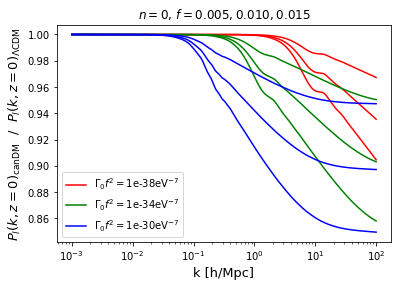

In [42]:
M=Class()

alpha=100.
alpha3 = alpha**3

f_list = [0.005,0.01,0.015]

# will use either
m_list = [1.e5,4.e5,1.e6]
# or
gamma0f2_list = [1.e-38,1.e-34,1.e-30]


color_list = ['r','g','b']

for i in range(len(m_list)):
    color = color_list[i]
    # if you want to use the mass list:
    #m = m_list[i]
    #print ('m=',m,' gamma0=',alpha3*m**-7)
    #
    for f in f_list:
        # if you ewant to use the gamm0f2 list:
        gamma0f2 = gamma0f2_list[i]
        gamma0 = gamma0f2_list[i]/f**2
        m=(alpha3/gamma0)**(1./7.)
        print ('m=',m)
        #
        M.set({
            'output' : 'mPk',
            'P_k_max_h/Mpc' : kmax,
            'Omega_cdm' : Odm*(1-f),
            'Omega_candm' : Odm * f,
            'n_index_candm':0,
            'M_candm':m,
            'alpha3_candm':alpha3,
            'background_method':1
        })
        M.compute()
        h=M.h()
        pk_M = np.vectorize(M.pk)(kk*h,0)
        if (f==0.01):
            plt.semilogx(kk,pk_M/pk_ref,color,
                         label = r'$\Gamma_0 f^2=$'+r'{a:,.0e}'.format(a=gamma0f2_list[i])+r'eV$^{-7}$')
        else:
            plt.semilogx(kk,pk_M/pk_ref,color)
plt.title(r'$n=0$, $f=0.005, 0.010, 0.015$')        
plt.ylabel(r'$P_l(k,z=0)_\mathrm{canDM} \ \ / \ \ P_l(k,z=0)_{\Lambda\mathrm{CDM}}$', fontsize=13)
plt.xlabel(r'k [h/Mpc]', fontsize=13)
plt.legend()

m= 30170.88168272583
m= 39810.71705534975
m= 46820.54920046208
m= 301708.8168272584
m= 398107.17055349756
m= 468205.4920046209
m= 3017088.168272584
m= 3981071.705534976
m= 4682054.920046209


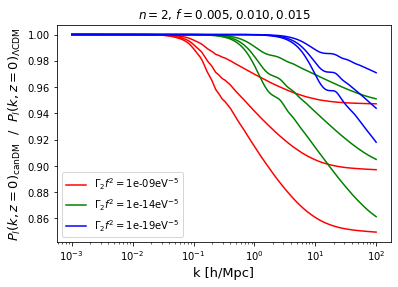

In [44]:
M=Class()

alpha=1.e6
alpha3 = alpha**3

f_list = [0.005,0.010,0.015]

# will use either
m_list = [1.e5,1.e6,1.e7]
# or
gamma2f2_list = [1.e-9,1.e-14,1.e-19]

color_list = ['r','g','b']

for i in range(len(m_list)):
    color = color_list[i]
    # if you want to use the mass list:
    #m = m_list[i]
    #print ('m=',m,' gamma2=',alpha3*m**-5)
    for f in f_list:
        # if you ewant to use the gamm0f2 list:
        gamma2f2 = gamma2f2_list[i]
        gamma2 = gamma2f2_list[i]/f**2
        m=(alpha3/gamma2)**(1./5.)
        print ('m=',m)
        #
        M.set({
            'output' : 'mPk',
            'P_k_max_h/Mpc' : kmax,
            'Omega_cdm' : Odm*(1-f),
            'Omega_candm' : Odm * f,
            'n_index_candm':2,
            'M_candm':m,
            'alpha3_candm':alpha3,
            'background_method':1
        })
        M.compute()
        h=M.h()
        pk_M = np.vectorize(M.pk)(kk*h,0)
        if (f==0.01):
            plt.semilogx(kk,pk_M/pk_ref,color,
                     label = r'$\Gamma_2 f^2=$'+r'{a:.0e}'.format(a=gamma2f2)+r'eV$^{-5}$')
        else:
            plt.semilogx(kk,pk_M/pk_ref,color)
plt.title(r'$n=2$, $f=0.005, 0.010, 0.015$')        
plt.ylabel(r'$P_l(k,z=0)_\mathrm{canDM} \ \ / \ \ P_l(k,z=0)_{\Lambda\mathrm{CDM}}$', fontsize=13)
plt.xlabel(r'k [h/Mpc]', fontsize=13)
plt.legend()